# Loss Functions

A loss function tells us how "close" two columns are to each other.

0 means they are the same.  Bigger means less close.

There are different metrics, such as euclidean distance and mean squared error (MSE).

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Geometry

In [13]:
# right triangle, sides 3 and 4, then the long side is 5
math.sqrt(3**2 + 4**2)

5.0

In [7]:
df = pd.DataFrame(
    [[0, 3, 2, -6],
     [0, 4, 5, 8]],
    index=["x", "y"],
    columns=["a", "b", "c", "d"])
df

,a,b,c,d
x,0,3,2,-6
y,0,4,5,8


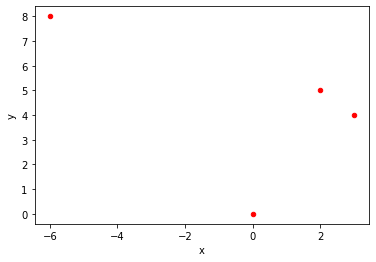

In [15]:
df.T.plot.scatter("x", "y", c="r")

In [24]:
def euc_dist(c1, c2):
    return ((c1 - c2) ** 2).sum() ** 0.5
euc_dist(df["a"], df["b"])

5.0

In [25]:
euc_dist(df["a"], df["d"])

10.0

In [26]:
euc_dist(df["b"], df["c"])

1.4142135623730951

# Many Dimensions

In [27]:
x = np.random.normal(10, 5, 30)
noise = np.random.normal(0, 6, 30)
y = x * -2.5 + 80 + noise # slope 2.5, intercept 80
df = pd.DataFrame({"x":x, "y":y, "const": 1})
X = df[["x", "const"]].values
y = df["y"].values.reshape(-1,1)
P = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
df["p"] = P @ y
df["a"] = df["y"].mean()
df.head()

,x,y,const,p,a
0,14.403890,43.214275,1,42.933546,48.780277
1,12.951904,41.245057,1,46.398675,48.780277
2,14.329056,45.501360,1,43.112137,48.780277
3,14.727673,36.547534,1,42.160846,48.780277
4,20.286353,25.149870,1,28.895189,48.780277


In [28]:
euc_dist(df["y"], df["p"])

34.83316257330974

In [29]:
euc_dist(df["y"], df["a"])

78.20636054570066

In [30]:
euc_dist(df["y"], df["x"])

227.53319408434277

In [33]:
def mse(c1, c2):
    return ((c1 - c2) ** 2).sum() / len(c1)
mse(df["y"], df["p"])

40.44497382862088

In [34]:
mse(df["y"], df["a"])

203.87449432680415